In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv("//home//joseph//Source//Sample//ML//Basics//dataset//Housing.csv")

# Display the first few rows
print(data.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [12]:
print(data.describe())
print(data.info())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------

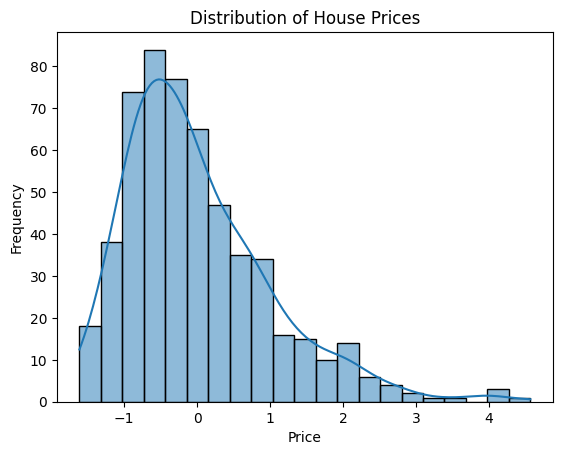

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


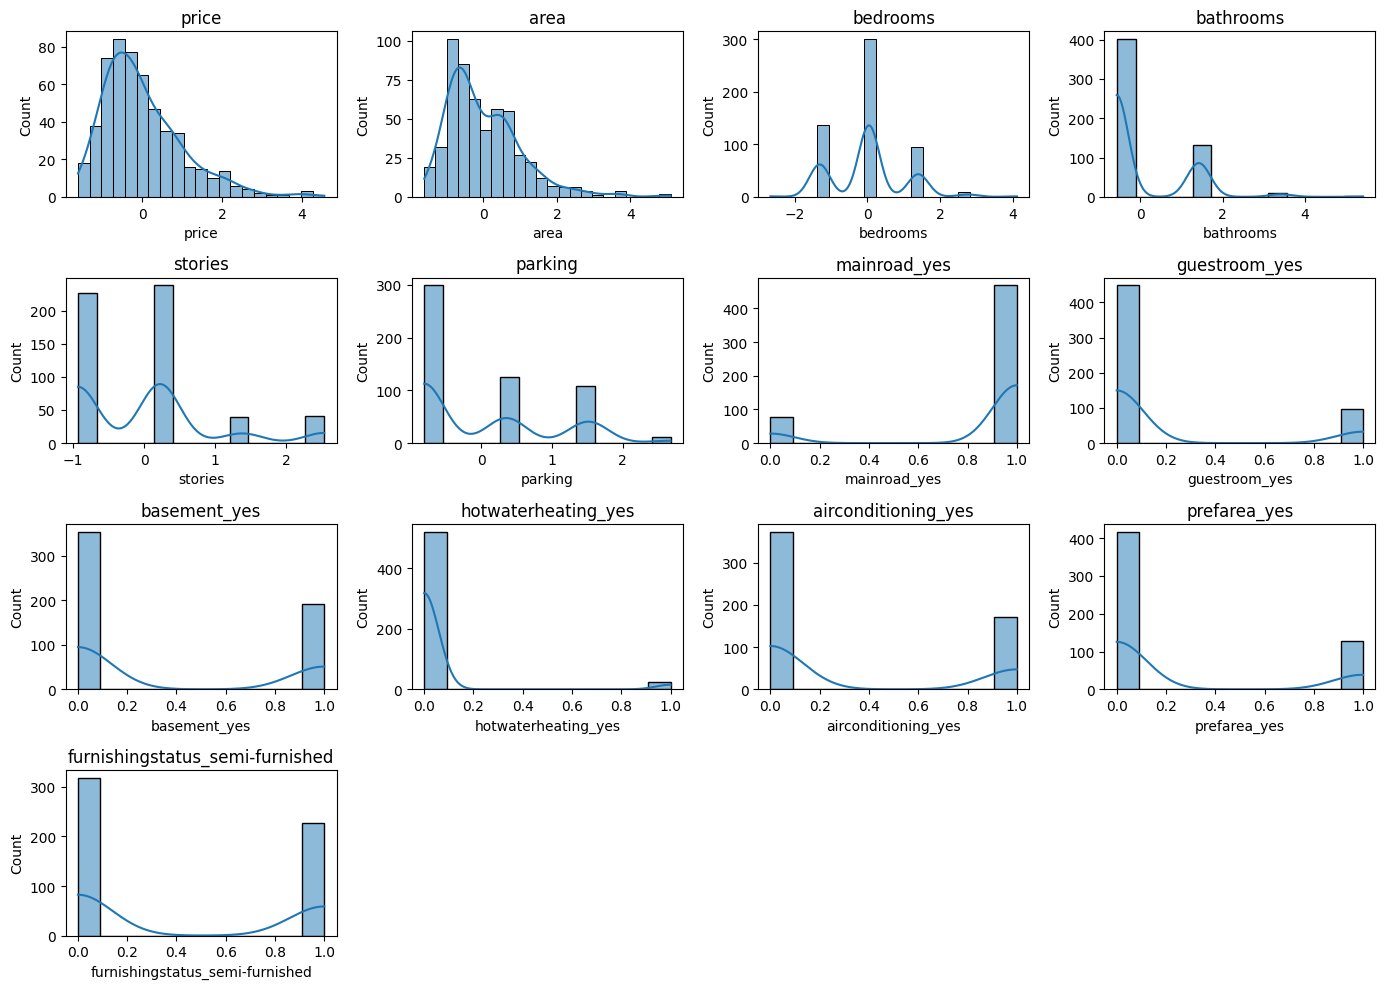

In [34]:
# Check the distribution of features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

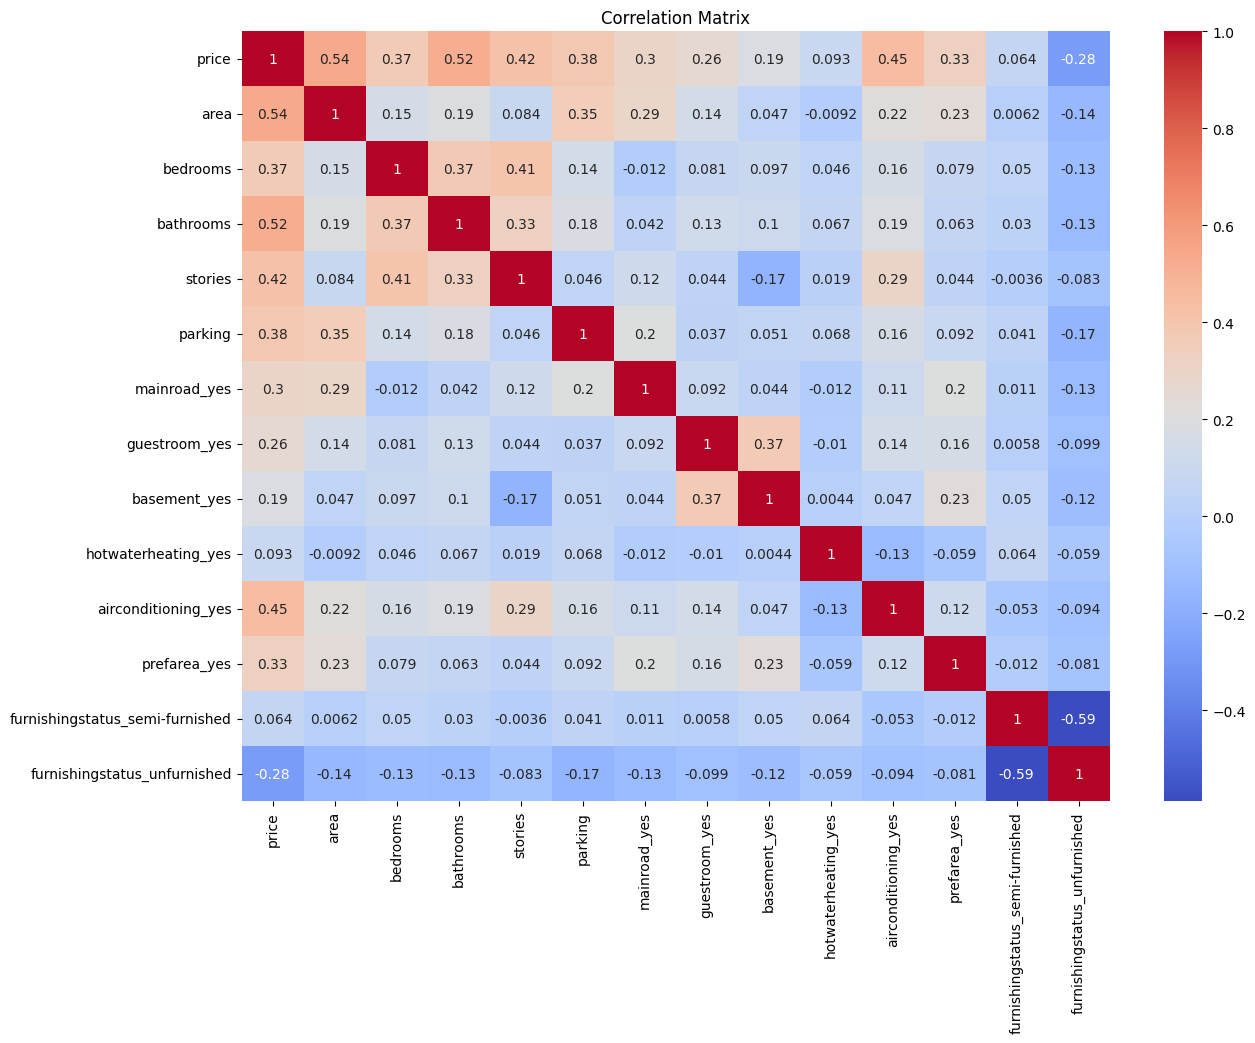

In [24]:
plt.figure(figsize=(14, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


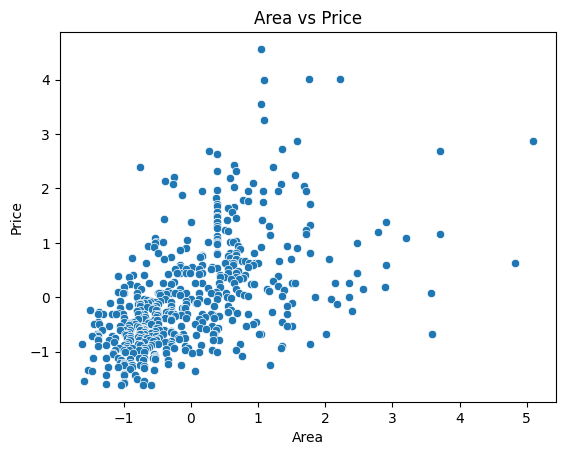

In [25]:
sns.scatterplot(x=data['area'], y=data['price'])
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


In [18]:
for col in data.select_dtypes(include=['float', 'int']).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

/tmp/ipykernel_108081/2133490345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipykernel_108081/2133490345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [19]:
data = pd.get_dummies(data, drop_first=True)

In [26]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()

# Scale the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [28]:
corr_matrix = data.corr()
high_corr_features = corr_matrix['price'][corr_matrix['price'].abs() > 0.5].index
print("Highly Correlated Features:", high_corr_features)

Highly Correlated Features: Index(['price', 'area', 'bathrooms'], dtype='object')


In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = data.drop('price', axis=1)
y = data['price']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=8)  # Select top 8 features
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['area', 'bathrooms', 'mainroad_yes', 'basement_yes',
       'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_unfurnished'],
      dtype='object')


In [30]:
from sklearn.model_selection import train_test_split

X = data[selected_features]  # Use selected features from RFE or correlation
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.61
R² Score: 0.58


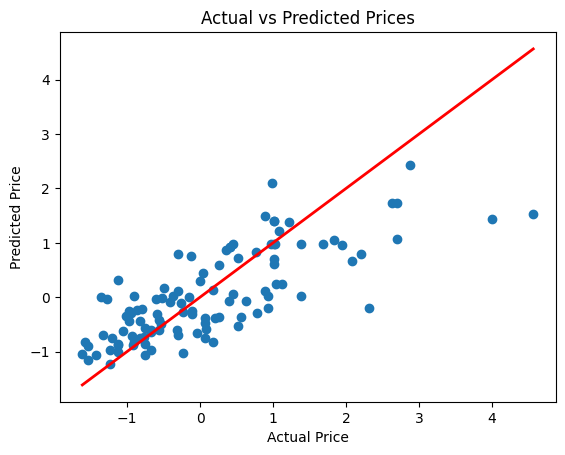

In [32]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

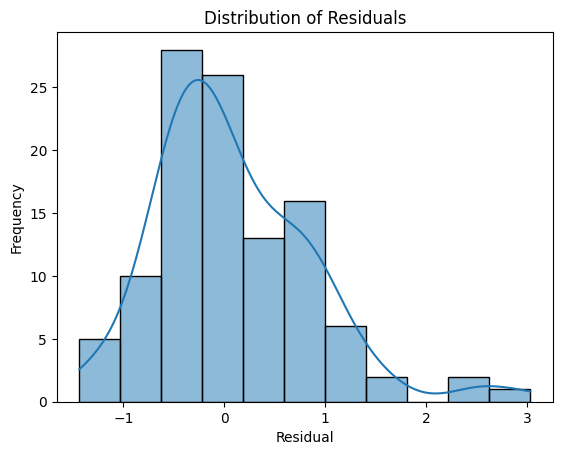

In [33]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()